### Quantum Econophysics - Quantum Neural Networks (QNNs) for Economic Forecasting

Quantum Neural Networks (QNNs) represent a cutting-edge approach to economic forecasting, blending the intricacies of quantum mechanics with the analytical power of neural networks. In the field of quantum econophysics, QNNs are emerging as a sophisticated tool capable of modeling complex economic phenomena that traditional methods struggle to handle. 

QNNs operate by encoding economic data into quantum states, allowing for the exploration of vast solution spaces simultaneously—a hallmark of quantum computation. This quantum parallelism offers a distinct advantage in processing the highly non-linear, multi-dimensional data that characterizes financial markets. By leveraging quantum superposition and entanglement, QNNs can capture correlations and dependencies within the data that might be missed by classical neural networks.

In economic forecasting, this means QNNs can model and predict market behaviors more accurately, especially in environments where uncertainty and volatility are prevalent. The ability of QNNs to work with quantum data and learn from it offers new possibilities for predicting market trends, assessing risks, and optimizing investment strategies. For instance, by feeding historical market data into a QNN, it is possible to forecast future market movements with greater precision, taking into account the subtle, complex interactions between different economic variables.

Furthermore, QNNs are particularly suited for handling large-scale financial models that require processing a significant amount of data in real-time. As financial markets become increasingly complex and interconnected, the need for more powerful and sophisticated forecasting tools grows. QNNs, with their ability to perform computations on a quantum level, could provide the necessary computational power to handle these challenges.

Incorporating QNNs into economic forecasting frameworks also opens the door to more advanced forms of algorithmic trading and risk management. By using quantum-enhanced models, financial institutions can develop more robust strategies that account for a wider range of possible outcomes, thereby reducing risk and increasing potential returns.

Quantum Neural Networks are set to revolutionize economic forecasting by providing a quantum leap in how we model and predict financial markets. As quantum technologies continue to advance, the integration of QNNs into economic forecasting will likely become more prevalent, offering new insights and strategies in the ever-evolving world of finance. This quantum approach to econophysics not only enhances our understanding of economic systems but also equips us with the tools to better navigate the uncertainties of global markets.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter
from qiskit.primitives import Sampler
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_machine_learning.connectors import TorchConnector
import matplotlib.pyplot as plt 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define the quantum circuit
num_qubits = 4
params = [Parameter(f'theta_{i}') for i in range(num_qubits)]
qc = QuantumCircuit(num_qubits)

for i in range(num_qubits):
    qc.rx(params[i], i)

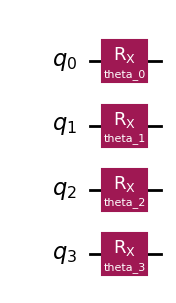

In [3]:
# Visualize the circuit
qc.draw('mpl')
plt.show()

In [4]:
#Inistialize simulator and sampler
simulator = AerSimulator()
sampler = Sampler()

In [5]:
# Define the QNN 
qnn = SamplerQNN(circuit=qc, input_params=params, sampler=sampler)

In [6]:
# Define a PyTorch model
class QuantumNeuralNetwork(nn.Module):
    def __init__(self, qnn):
        super(QuantumNeuralNetwork, self).__init__()
        self.qnn = TorchConnector(qnn)

    def forward(self, x):
        return self.qnn(x)

In [7]:
# Instantiate the model
model = QuantumNeuralNetwork(qnn)

In [8]:
# Generate synthetic data
X_train = torch.rand((32, num_qubits))
y_train = torch.rand((32, 1))

In [9]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
# Training loop
epochs = 10
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

Epoch 1/10, Loss: 0.3690958619117737
Epoch 2/10, Loss: 0.3690958619117737
Epoch 3/10, Loss: 0.3690958619117737
Epoch 4/10, Loss: 0.3690958619117737
Epoch 5/10, Loss: 0.3690958619117737
Epoch 6/10, Loss: 0.3690958619117737
Epoch 7/10, Loss: 0.3690958619117737
Epoch 8/10, Loss: 0.3690958619117737
Epoch 9/10, Loss: 0.3690958619117737
Epoch 10/10, Loss: 0.3690958619117737
